# A small version of DCGAN that outputs MNIST images of size 28x28x1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Reshape
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Mean
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [ ]:
mnist_data = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist_data["data"]
# Normalize pixels to [0, 1]
X = X / 255.0

In [3]:
x_real = X[:10000].reshape(-1, 28, 28, 1)

In [4]:
# Build a discriminator model
D_in = Input(batch_shape = (None, 28, 28, 1))
dh = Conv2D(16, 5, strides=1, activation='leaky_relu', padding='same')(D_in)
dh = Conv2D(32, 5, strides=2, activation='leaky_relu', padding='same')(dh)
dh = Conv2D(64, 5, strides=2, activation='leaky_relu', padding='same')(dh)
dh = Flatten()(dh)
D_out = Dense(1, activation='sigmoid')(dh)
D = Model(D_in, D_out)
D.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         3,137 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,649 (264.25 KB)

 Trainable params: 67,649 (264.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Build a generator model
nG_input = 100
G_in = Input(batch_shape=(None, nG_input))
gh = Dense(7 * 7 * 32)(G_in)
gh = Reshape((7, 7, 32))(gh)
gh = Conv2DTranspose(32, 5, strides=2,padding='same')(gh)
gh = BatchNormalization()(gh)
gh = Activation('relu')(gh)
gh = Conv2DTranspose(16, 5, strides=1,padding='same')(gh)
gh = BatchNormalization()(gh)
gh = Activation('relu')(gh)
gh = Conv2DTranspose(1, 5, strides=2,padding='same')(gh)
G_out = Activation('sigmoid')(gh)
G = Model(G_in, G_out)
G.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1568)           │       158,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 32)     │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 14, 14, 16)     │        12,816 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           401 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,409 (771.13 KB)

 Trainable params: 197,313 (770.75 KB)

 Non-trainable params: 96 (384.00 B)

In [9]:
# Build a DCGAN model using a Keras custom model
class DCGAN(Model):
    def __init__(self, D, G, **kwargs):
        super().__init__(**kwargs)
        self.D = D
        self.G = G
        self.D_opt = optimizers.Adam(0.0002, beta_1 = 0.5)
        self.G_opt = optimizers.Adam(0.0002, beta_1 = 0.5)
        self.D_loss_tracker = Mean(name="D_loss")
        self.G_loss_tracker = Mean(name="G_loss")
    
    def lossD(self, x, z):  # Loss for Discriminator
        # Clip the output values of D to prevent the loss from becoming non or inf
        Gz = self.G(z)
        Dx = tf.clip_by_value(self.D(x), 1e-8, 1.0)
        DGz = tf.clip_by_value(self.D(Gz), 1e-8, 0.999999)
        return -tf.reduce_mean(tf.math.log(Dx) + tf.math.log(1. - DGz))  # E[log D(x)] + E[log 1 - D(G(z))]

    def lossG(self, z):  # Loss for Generator
        Gz = self.G(z)
        DGz = tf.clip_by_value(self.D(Gz), 1e-8, 1.0)
        return -tf.reduce_mean(tf.math.log(DGz))  # min E[log 1 - D(G(z))] = max E[log D(G(z))]
    
    @property
    def metrics(self):
        return [self.D_loss_tracker, self.G_loss_tracker]

    def train_step(self, x):
        m = tf.shape(x)[0]     # minibatch size
        
        # Sample minibatch of m noise samples z from a uniform distribution
        z = tf.random.uniform((m, nG_input), -1.0, 1.0)
        # Update the discriminator D
        with tf.GradientTape() as tape:
            d_loss = self.lossD(x, z)
        d_grads = tape.gradient(d_loss, self.D.trainable_variables)
        self.D_opt.apply_gradients(zip(d_grads, self.D.trainable_variables))
        
        # Sample minibatch of m noise samples z from a uniform distribution
        z = tf.random.uniform((m, nG_input), -1.0, 1.0)
        # Update the generator G
        with tf.GradientTape() as tape:
            g_loss = self.lossG(z)
        g_grads = tape.gradient(g_loss, self.G.trainable_variables)
        self.G_opt.apply_gradients(zip(g_grads, self.G.trainable_variables))

        # Compute our own metrics       
        self.D_loss_tracker.update_state(self.lossD(x, z))
        self.G_loss_tracker.update_state(self.lossG(z))
        
        return {"D_loss": self.D_loss_tracker.result(), "G_loss": self.G_loss_tracker.result()}

In [10]:
model = DCGAN(D, G)
model.compile(optimizer=Adam())
hist = model.fit(x_real, epochs=100, batch_size=200, shuffle=True, verbose=2)

Epoch 1/100
50/50 - 12s - 243ms/step - D_loss: 0.4389 - G_loss: 2.4839
Epoch 2/100
50/50 - 10s - 203ms/step - D_loss: 0.1094 - G_loss: 2.9214
Epoch 3/100
50/50 - 14s - 272ms/step - D_loss: 0.1067 - G_loss: 3.6922
Epoch 4/100
50/50 - 15s - 304ms/step - D_loss: 0.3157 - G_loss: 3.0615
Epoch 5/100
50/50 - 15s - 305ms/step - D_loss: 0.4948 - G_loss: 2.1764
Epoch 6/100
50/50 - 16s - 320ms/step - D_loss: 0.6277 - G_loss: 1.7608
Epoch 7/100
50/50 - 20s - 403ms/step - D_loss: 0.6635 - G_loss: 1.6409
Epoch 8/100
50/50 - 17s - 340ms/step - D_loss: 0.7709 - G_loss: 1.5830
Epoch 9/100
50/50 - 18s - 352ms/step - D_loss: 0.8695 - G_loss: 1.4379
Epoch 10/100
50/50 - 18s - 356ms/step - D_loss: 0.9877 - G_loss: 1.2677
Epoch 11/100
50/50 - 19s - 372ms/step - D_loss: 1.0085 - G_loss: 1.1950
Epoch 12/100
50/50 - 15s - 297ms/step - D_loss: 0.9607 - G_loss: 1.2348
Epoch 13/100
50/50 - 15s - 302ms/step - D_loss: 0.8715 - G_loss: 1.2799
Epoch 14/100
50/50 - 17s - 338ms/step - D_loss: 0.8782 - G_loss: 1.3205
E

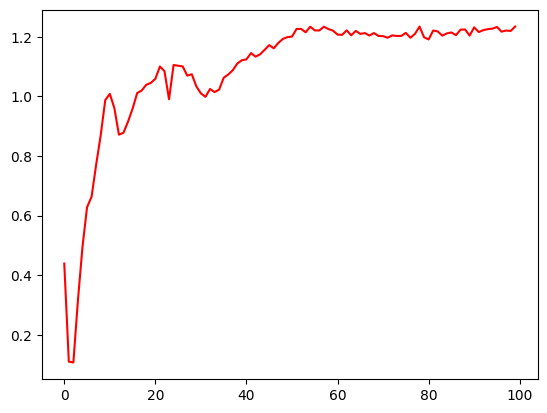

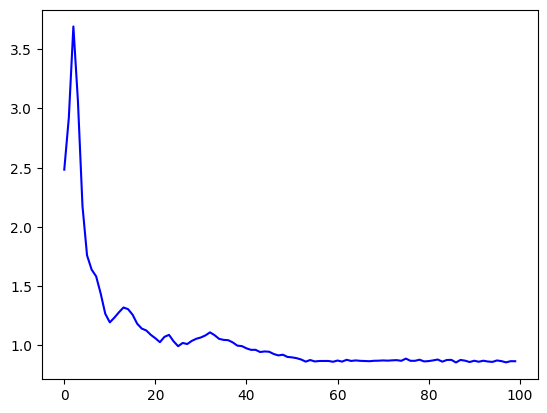

In [11]:
# Loss history
plt.plot(hist.history['D_loss'], c='red'); plt.show()
plt.plot(hist.history['G_loss'], c='blue'); plt.show()

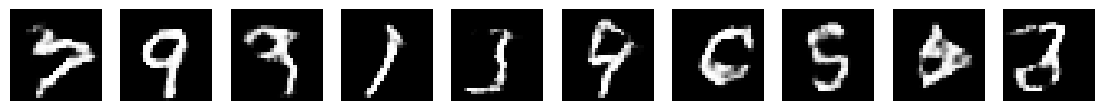

In [13]:
# Generate MNIST images
n_sample = 10
z = np.random.uniform(-1.0, 1.0, size=[n_sample, nG_input])
gen_img = G(z).numpy()

fig, ax = plt.subplots(1, n_sample, figsize=(14, 4))
for i in range(n_sample):
    p = gen_img[i, :, :]
    ax[i].imshow(p, cmap='gray')
    ax[i].axis('off')
plt.show()